## 一、遛狗牵绳检测

### 1.项目简介
当今社会，遛狗不牵绳已经造成很多悲剧，常见小孩被狗咬，或小狗跑入机动车道一命呜呼，或因不牵绳惊吓老人小孩造成邻里不和，诸如此类举不胜举，因此，开发一种能够智能监控遛狗行为的智能摄像头迫在眉睫。本项目着眼智能检测遛狗行为应运而生。


![](https://ai-studio-static-online.cdn.bcebos.com/00dbdf7aec164555b2a2d13ca9de34c18a15c600df384da1801dac855da2c2f8)
![](https://ai-studio-static-online.cdn.bcebos.com/55d0f05ee4994e758c9c942347bedd171d5a8abb9df245e9bb32f8ff949e85d5)
![](https://ai-studio-static-online.cdn.bcebos.com/2f89560749504186bdec89619e63b91cd8f7794dc7a84d49a92c7c7f36468946)
![](https://ai-studio-static-online.cdn.bcebos.com/33eeca1211cd4c7ea6a84d4f13470ce85c804828da7344789f6ecab913d2d089)
![](https://ai-studio-static-online.cdn.bcebos.com/37febc9e51e84fd29524efd288f5311f6e9177e92d0e41a8a5d42f0390b2a3cd)

### 2.数据集介绍
通过爬取百度图片上千条遛狗图片，并人工筛选合用图片，并通过 EasyDL进行智能标注。


## 二、数据集获取

### 1.爬取百度图片
该代码建议终端下运行
```
python get_pic.py
```


In [ ]:
import requests
import re
import os


def get_pic():
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36'}
    name = input('您要爬取什么图片: ')
    num = 0
    num_1 = 0
    num_2 = 0
    x = input('您要爬取几张呢?，输入1等于60张图片: ')
    list_1 = []
    for i in range(int(x)):
        name_1 = os.getcwd()
        name_2 = os.path.join(name_1, '图片')
        url = 'https://image.baidu.com/search/flip?tn=baiduimage&ie=utf-8&word=' + name + '&pn=' + str(i * 30)
        res = requests.get(url, headers=headers)
        htlm_1 = res.content.decode()
        a = re.findall('"objURL":"(.*?)",', htlm_1)
        if not os.path.exists(name_2):
            os.makedirs(name_2)
        for b in a:
            try:
                b_1 = re.findall('https:(.*?)&', b)
                b_2 = ''.join(b_1)
                if b_2 not in list_1:
                    num = num + 1
                    img = requests.get(b)
                    f = open(os.path.join(name_1, '图片', name + str(num) + '.jpg'), 'ab')
                    print('---------正在下载第' + str(num) + '张图片----------')
                    f.write(img.content)
                    f.close()
                    list_1.append(b_2)
                elif b_2 in list_1:
                    num_1 = num_1 + 1
                    continue
            except Exception as e:
                print('---------第' + str(num) + '张图片无法下载----------')
                num_2 = num_2 + 1
                continue
    print('下载完成,总共下载{}张,成功下载:{}张,重复下载:{}张,下载失败:{}张'.format(num + num_1 + num_2, num, num_1, num_2))


if __name__ == '__main__':
    get_pic()


### 2. EasyDL数据标注



![](https://ai-studio-static-online.cdn.bcebos.com/56d73f20694e4c5db5c9c7f0f241e5e38acb389f5ca1416c98ac4ef65dd858c6)


![](https://ai-studio-static-online.cdn.bcebos.com/089e72e18b1c4e4489b69be1746e9e1d7886e30e484c438b916a6b31de1e5161)

![](https://ai-studio-static-online.cdn.bcebos.com/e6ee9887fe604c82a8d182793fcc9a3d558f2e41dd17442eb41ebaed0cb4a79f)

![](https://ai-studio-static-online.cdn.bcebos.com/2535bdd69aa942959554025c2dcd71308801b7884c9c48d09d4719fa7cd217af)



### 3.数据导入AI Studio
新建数据集，选择EasyData导入即可，如下图所示：

![](https://ai-studio-static-online.cdn.bcebos.com/7da5c0e3b42e4016b00dae980a9364d1613fac01ef2e48d7a783794fc032fc95)


### 4.数据解压缩

In [ ]:
!unzip -qoa data/data129006/DatasetId_307039_1645455309.zip

### 5.数据查看

In [ ]:
!tree DatasetId_307039_1645455309 -L 1

DatasetId_307039_1645455309
├── Annotations
└── Images

2 directories, 0 files


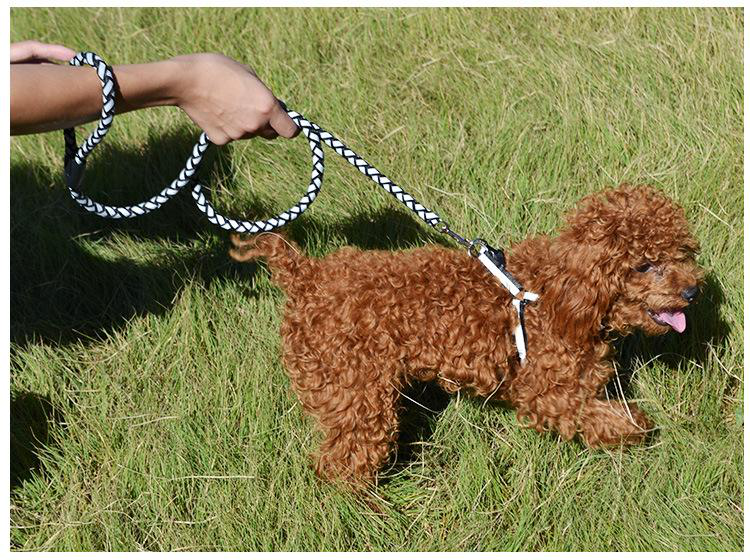

In [ ]:
from PIL import Image

img=Image.open('DatasetId_307039_1645455309/Images/055a092f09b507a303ca816b146b357f5650e1599de5e30449710f6323976cd2.jpeg')
img

In [ ]:
!cat DatasetId_307039_1645455309/Annotations/055a092f09b507a303ca816b146b357f5650e1599de5e30449710f6323976cd2.xml

<?xml version='1.0' encoding='UTF-8'?>
<annotation>
  <filename>055a092f09b507a303ca816b146b357f5650e1599de5e30449710f6323976cd2.jpeg</filename>
  <object_num>2</object_num>
  <size>
    <width>750</width>
    <height>560</height>
  </size>
  <object>
    <name>DOG</name>
    <difficult>0</difficult>
    <bndbox>
      <xmin>173</xmin>
      <ymin>86</ymin>
      <xmax>737</xmax>
      <ymax>494</ymax>
    </bndbox>
  </object>
  <object>
    <name>ROPE</name>
    <difficult>0</difficult>
    <bndbox>
      <xmin>35</xmin>
      <ymin>64</ymin>
      <xmax>559</xmax>
      <ymax>275</ymax>
    </bndbox>
  </object>
</annotation>


## 三、PaddleX环境准备

###  1.PaddleX安装


In [ ]:
!pip install paddlex

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.6 MB 7.2 MB/s            
     |████████████████████████████████| 2.7 MB 2.9 MB/s            
     |████████████████████████████████| 106 kB 6.0 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 2.0 MB 5.4 MB/s            
     |████████████████████████████████| 6.8 MB 3.1 MB/s            
     |████████████████████████████████| 1.5 MB 3.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 151 kB 4.2 MB/s            
     |████████████████████████████████| 310 kB 5.3 MB/s            
     |████████████████████████████████| 50 kB 1.8 MB/s             
     |████████████████████████████████| 296 kB 4.9 MB/s            
     |████████████████████████████████| 98 kB 4.6 MB/s             
     |█████████

In [ ]:
!pip list|grep paddlex

paddlex                2.1.0
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


### 2.GPU环境

In [ ]:
!nvidia-smi

Tue Feb 22 10:56:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:05:00.0 Off |                    0 |
| N/A   35C    P0    40W / 300W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 四、开始训练
### 1.导入必要的包

In [ ]:
# 环境变量配置，用于控制是否使用GPU
# 说明文档：https://paddlex.readthedocs.io/zh_CN/develop/appendix/parameters.html#gpu
import os
# 根据卡的情况设置，此处可以忽略
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import paddlex as pdx
# 注意和1.x的有区别
from paddlex import transforms as T

[02-22 10:56:49 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_serialization_context()
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: Depreca

### 2.数据集划分

In [ ]:
!mv DatasetId_307039_1645455309/Images DatasetId_307039_1645455309/JPEGImages

In [ ]:
!paddlex --split_dataset --format VOC --dataset_dir DatasetId_307039_1645455309 --val_value 0.2

[02-22 10:56:55 MainThread @logger.py:242] Argv: /opt/conda/envs/python35-paddle120-env/bin/paddlex --split_dataset --format VOC --dataset_dir DatasetId_307039_1645455309 --val_value 0.2
[02-22 10:56:55 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_serialization_context()
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-e

### 2.数据集设置

In [ ]:
# 定义训练和验证时的T
# API说明 https://paddlex.readthedocs.io/zh_CN/develop/apis/T/det_T.html
train_transforms = T.Compose([
    # T.MixupImage(mixup_epoch=250), T.RandomDistort(),
    T.RandomExpand(), T.RandomCrop(), T.Resize(
        target_size=608, interp='RANDOM'), T.RandomHorizontalFlip(),
    T.Normalize()
])

eval_transforms = T.Compose([
    T.Resize(
        target_size=608, interp='CUBIC'), T.Normalize()
])

# 定义训练和验证所用的数据集
# API说明：https://paddlex.readthedocs.io/zh_CN/develop/apis/datasets.html#paddlex-datasets-vocdetection
train_dataset = pdx.datasets.VOCDetection(
    data_dir='DatasetId_307039_1645455309',
    file_list='DatasetId_307039_1645455309/train_list.txt',
    label_list='DatasetId_307039_1645455309/labels.txt',
    transforms=train_transforms,
    shuffle=True)
    
eval_dataset = pdx.datasets.VOCDetection(
    data_dir='DatasetId_307039_1645455309',
    file_list='DatasetId_307039_1645455309/val_list.txt',
    label_list='DatasetId_307039_1645455309/labels.txt',
    transforms=eval_transforms)

2022-02-22 10:57:28 [INFO]	Starting to read file list from dataset...
2022-02-22 10:57:28 [INFO]	112 samples in file DatasetId_307039_1645455309/train_list.txt, including 112 positive samples and 0 negative samples.
creating index...
index created!
2022-02-22 10:57:28 [INFO]	Starting to read file list from dataset...
2022-02-22 10:57:28 [INFO]	28 samples in file DatasetId_307039_1645455309/val_list.txt, including 28 positive samples and 0 negative samples.
creating index...
index created!


### 3.训练

In [ ]:
# 初始化模型，并进行训练
# 可使用VisualDL查看训练指标，参考https://paddlex.readthedocs.io/zh_CN/develop/train/visualdl.html
num_classes = len(train_dataset.labels)

# API说明: https://paddlex.readthedocs.io/zh_CN/develop/apis/models/detection.html#paddlex-det-yolov3
model = pdx.det.PPYOLO(num_classes=num_classes)

# API说明: https://paddlex.readthedocs.io/zh_CN/develop/apis/models/detection.html#train
# 各参数介绍与调整说明：https://paddlex.readthedocs.io/zh_CN/develop/appendix/parameters.html
model.train(
    num_epochs=270,
    train_dataset=train_dataset,
    train_batch_size=16,
    eval_dataset=eval_dataset,
    learning_rate=0.000125,
    lr_decay_epochs=[60, 100],
    save_dir='output/ppyolo',
    use_vdl=True)

```
2022-02-22 11:06:06 [INFO]	[TRAIN] Epoch 50 finished, loss_xy=1.8030771, loss_wh=1.8415105, loss_iou=5.346631, loss_iou_aware=1.34119, loss_obj=15.676635, loss_cls=2.6728053, loss=28.68185 .
2022-02-22 11:06:06 [WARNING]	Detector only supports single card evaluation with batch_size=1 during evaluation, so batch_size is forcibly set to 1.
2022-02-22 11:06:06 [INFO]	Start to evaluate(total_samples=28, total_steps=28)...
2022-02-22 11:06:08 [INFO]	Accumulating evaluatation results...
2022-02-22 11:06:08 [INFO]	[EVAL] Finished, Epoch=50, bbox_map=2.629171 .
2022-02-22 11:06:08 [INFO]	Current evaluated best model on eval_dataset is epoch_49, bbox_map=15.801246454000003
2022-02-22 11:06:09 [INFO]	Model saved in output/ppyolo/epoch_50.
2022-02-22 11:06:16 [INFO]	[TRAIN] Epoch 51 finished, loss_xy=1.933626, loss_wh=1.8231293, loss_iou=5.459443, loss_iou_aware=1.3223228, loss_obj=17.76362, loss_cls=2.6294556, loss=30.931597 .
2022-02-22 11:06:16 [WARNING]	Detector only supports single card evaluation with batch_size=1 during evaluation, so batch_size is forcibly set to 1.
2022-02-22 11:06:16 [INFO]	Start to evaluate(total_samples=28, total_steps=28)...
2022-02-22 11:06:18 [INFO]	Accumulating evaluatation results...
2022-02-22 11:06:18 [INFO]	[EVAL] Finished, Epoch=51, bbox_map=12.878964 .
2022-02-22 11:06:18 [INFO]	Current evaluated best model on eval_dataset is epoch_49, bbox_map=15.801246454000003
2022-02-22 11:06:19 [INFO]	Model saved in output/ppyolo/epoch_51.
2022-02-22 11:06:23 [INFO]	[TRAIN] Epoch=52/270, Step=3/7, loss_xy=1.921747, loss_wh=1.810229, loss_iou=5.621733, loss_iou_aware=1.493061, loss_obj=16.106371, loss_cls=2.959830, loss=29.912970, lr=0.000125, time_each_step=1.14s, eta=0:36:13
```

## 五、部署

PaddleX已经集成了基于Python的高性能预测接口，下面演示单张图片和视频流的预测效果。


In [2]:
import glob
import numpy as np
import threading
import time
import random
import os
import base64
import cv2
import json
import paddlex as pdx

image_name = 'DatasetId_307039_1645455309/JPEGImages/123db97ceac3101e91fbf1cc74c0c063cf41b44aecf387316442eccf442093d6.jpeg'
model = pdx.load_model('./output/ppyolo/best_model')

img = cv2.imread(image_name)
result = model.predict(img)

keep_results = []
areas = []
f = open('result.txt', 'a')
count = 0
for dt in np.array(result):
    cname, bbox, score = dt['category'], dt['bbox'], dt['score']
    if score < 0.5:
        continue
    keep_results.append(dt)
    count += 1
    f.write(str(dt) + '\n')
    f.write('\n')
    areas.append(bbox[2] * bbox[3])
areas = np.asarray(areas)
sorted_idxs = np.argsort(-areas).tolist()
keep_results = [keep_results[k]
                for k in sorted_idxs] if len(keep_results) > 0 else []
print(keep_results)
print(count)
f.write("the total number is :" + str(int(count)))
f.close()

pdx.det.visualize(
    image_name, result, threshold=0.1, save_dir='./output/ppyolo')


2022-02-22 11:16:27 [INFO]	Model[PPYOLO] loaded.
[]
0
2022-02-22 11:16:27 [INFO]	The visualized result is saved at ./output/ppyolo/visualize_123db97ceac3101e91fbf1cc74c0c063cf41b44aecf387316442eccf442093d6.jpeg


### 1.导出预测模型

In [ ]:
!paddlex --export_inference --model_dir=./output/ppyolo/best_model --save_dir=./

[02-22 00:33:22 MainThread @logger.py:242] Argv: /opt/conda/envs/python35-paddle120-env/bin/paddlex --export_inference --model_dir=./output/ppyolo/best_model --save_dir=./
[02-22 00:33:22 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_serialization_context()
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.

### 2.单张图片预测
选择一张测试集中的图片，查看预测效果

In [ ]:
import paddlex as pdx
predictor = pdx.deploy.Predictor('./inference_model')
result = predictor.predict(img_file='DatasetId_307039_1645455309/JPEGImages/2934d66d734b5a8ece26df70c83d0d7168907bace2887a1f79ed0130dd50fa0d.jpeg')
print(result)

2022-02-22 00:40:29 [INFO]	Model[PPYOLO] loaded.
------------------ Inference Time Info ----------------------
total_time(ms): 988.9, img_num: 1, batch_size: 1
average latency time(ms): 988.90, QPS: 1.011225
preprocess_time_per_im(ms): 67.10, inference_time_per_batch(ms): 921.70, postprocess_time_per_im(ms): 0.10
[]


[]
